In [162]:

import matplotlib.pyplot as plt
import numpy as np

In [163]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


Tested with 30x30 images

In [175]:
im_five = rgb2gray(imageio.imread('im_five_bw.png')[:,:,:3])
im_three = rgb2gray(imageio.imread('im_three_bw.png')[:,:,:3])

im_five = (im_five>0).astype(int)
im_three = (im_three>0).astype(int)

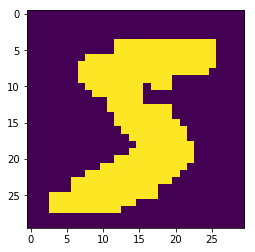

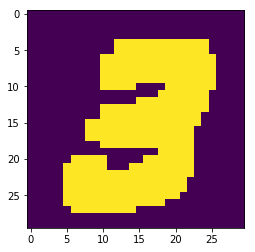

In [178]:
plt.imshow(im_five)
plt.show()
plt.imshow(im_three)
plt.show()

In [209]:
class MetamorphoseCreator:
    def __init__(self, im1, im2):
        assert len(im1.shape) == 2 and len(im2.shape) ==2
        assert im1.shape == im2.shape
        self.draw_space = np.zeros((im1.shape[0], im1.shape[1], im1.shape[1]))
        self.im1 = im1
        self.im2 = im2
    
    def get_projection(self, player):
        assert player < 3
        projection = self.draw_space.max(axis=player)
        projection_bin = (projection>0).astype(int)
        return projection_bin
        
    def player_two_draw(self):
        """
        Player 2 draws a single point
        
        """
        projection = self.get_projection(2)
        remaining_image = self.im2-projection
        
        if remaining_image.sum() == 0:
            return (-1, -1) #TODO ugly
        # get the first 1 pixel
        x,y = remaining_image.shape
        for i in range(x):
            for j in range(y):
                if remaining_image[i][j] == 1:
                    
                    return i,j
    
    
    def create_point_cloud(self):
        """
        Player 2 chooses an x,y (or rather, an (x,z))
        The point (x,z) is chosen as the first (from top-left) point 
        that has is already represented in the point cloud.
        
        Player 1 receives this x,z. The 'z' does not matter to player 1. No matter the value of z, the 
        projection to player 1 is the same.
        
        Player 1 tries to find a y for this point, by looking at the current pointcloud, 
        and player 1's target image. If no y can be found, player 2 assumes y=0 (TODO)
        """
        x,z = self.player_two_draw()
        while(x!=-1):
        
            
            projection = self.get_projection(1)
            remaining_image = self.im1-projection
            row = remaining_image[x]
            if row.sum()<=0:
                # overwrite a previous point if exists
                original_row = self.im1[x]
                if original_row.sum() == 0:
                    self.draw_space[x,z,0] = 1
                else:
                    for col in range(len(original_row)):
                        if original_row[col] >0:
                            self.draw_space[x,z,col] = 1
                            break
                    
            else:
                for col in range(len(row)):
                    if row[col] >0:
                        self.draw_space[x,z,col] = 1
                        
                
                
            
            x,z = self.player_two_draw()
            
        

In [221]:
d = MetamorphoseCreator(im_five, im_five)
d.create_point_cloud()

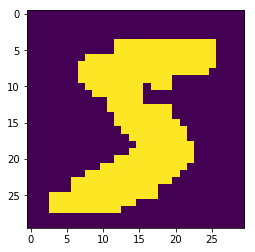

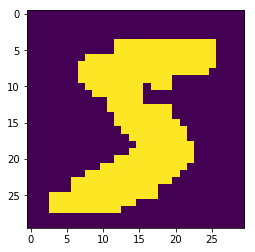

In [222]:
temp = d.get_projection(2)
plt.imshow(temp)
plt.show()
temp = d.get_projection(1)
plt.imshow(temp)
plt.show()

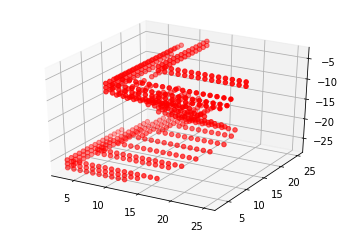

In [224]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
z,x,y = d.draw_space.nonzero()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, - z, zdir='z', c= 'red')
plt.savefig("demo.png")

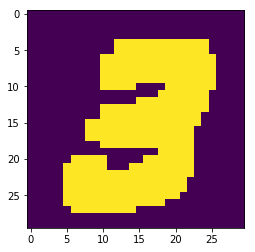

In [141]:
plt.imshow(im_three)

## Some notes:


Image 2 is always entirely drawn, perfectly.

Works better if image 2 has more white pixels than 1

Need a way to allow player 1 to refuse points


